# Language detection/ translation

### Examples

In [57]:
import time
import os
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series
from google.cloud import translate
import types
client=translate.Client()

In [3]:
#example translation
text ='Hola mundo'
target='en'
translation=client.translate(text, target_language=target)
print (translation)

{'detectedSourceLanguage': 'es', 'translatedText': 'Hello World', 'input': 'Hola mundo'}


In [22]:
#example detection
lan=client.detect_language(text)
print(lan['language'])
print(lan['confidence'])

es
1


###  Detecting language of unigrams

In [58]:
ranges=[]
lan_arr=[]
confidence=[]
for x in range (0, 56):
    ranges.append(251*x)
ranges.append(14047)


In [70]:
# open the file and fill out the language arrays
try:
    for j in range (0,56):
        i=0
        index1=ranges[j]+1
        index2=ranges[j+1]
        with open ('unigrams.txt', 'r') as f:
            for line in f:
                i+=1
                if (i>=index1):
#                     print(i)
                    lang=client.detect_language(line)
                    lan_arr.append(lang['language'])
                    confidence.append(lang['confidence'])
                    time.sleep(0.1)
                    if (i>=index2):
                        break
except:
    print('error')

In [144]:
for i in range (0,56):
    index1=ranges[i]+1
    index2=ranges[i+1]
#     print (index1)
#     print(index2)
#     print (" ")
    

In [60]:
languages=Series(lan_arr)
c_lan=languages.value_counts()

In [61]:
conf=Series(confidence)
conf.sum()/14047

0.7756208454326963

In [151]:
confidence

[0.7786561250686646,
 0.94921875,
 0.5943774580955505,
 0.3682170510292053,
 0.6807692050933838,
 0.9305019974708557,
 0.9766536951065063,
 0.6235294342041016,
 0.5155038833618164,
 0.96875,
 0.6932270526885986,
 0.5573121905326843,
 0.36259540915489197,
 0.6086956262588501,
 0.38339921832084656,
 0.7325581312179565,
 1,
 0.9647058844566345,
 0.390625,
 0.48616600036621094,
 1,
 0.8464567065238953,
 0.6039215922355652,
 0.78125,
 0.9609375,
 0.9685039520263672,
 0.5830116271972656,
 0.96875,
 0.98828125,
 0.3984375,
 0.9529411792755127,
 0.7782101035118103,
 0.5658913850784302,
 0.5896413922309875,
 0.5155038833618164,
 0.8661417961120605,
 0.4961240291595459,
 0.9377431869506836,
 0.98828125,
 0.8627451062202454,
 0.3774318993091583,
 0.4457363784313202,
 0.80859375,
 0.4901960790157318,
 1,
 1,
 0.98828125,
 0.6459143757820129,
 0.25868725776672363,
 1,
 0.5256916880607605,
 0.5277777314186096,
 0.3803921639919281,
 0.30859375,
 0.6332046985626221,
 0.98046875,
 0.8823529481887817,
 

In [64]:
c_lan

en       8171
es        752
ru        441
pt        371
fr        367
de        326
it        278
vi        273
pl        216
tr        199
nl        156
id        149
ro        141
ja        131
sv        119
ar        113
da        100
bg         95
sr         75
zh-CN      73
fi         69
no         69
hu         66
sl         58
ms         56
cs         54
bs         49
tl         49
et         46
cy         44
         ... 
jw         13
ht         12
ga         12
az         11
mn         10
th         10
ky         10
mk          9
lb          9
mg          9
be          9
ceb         9
gd          8
mi          7
fa          7
co          6
iw          5
hy          5
ha          5
sd          4
und         4
haw         4
ig          4
sn          3
st          3
xh          3
sm          3
kk          2
su          2
ps          1
Length: 86, dtype: int64

In [74]:
## write to file confidence data
i=0
f= open ('language2.txt','w')
for n in range (14047,len(lan_arr)):
    f.write(lan_arr[n])
    f.write('\n')
    i+=1
i

13903

## Freq distribution languages

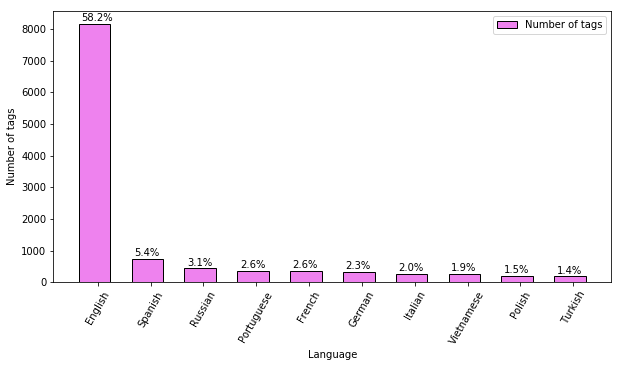

In [65]:
barWidth = 0.6
# height of the blue bars
bars1 = c_lan.values[0:10]
# The x position of bars
r1 = np.arange(len(bars1))
plt.figure(figsize=(10,5))
percent= ['58.2%', '5.4%', '3.1%', '2.6%', '2.6%', '2.3%', '2.0%', '1.9%', '1.5%', '1.4%']
xcuts=['English', 'Spanish', 'Russian', 'Portuguese', 'French', 'German', 'Italian', 'Vietnamese', 'Polish', 'Turkish']
plt.bar(r1, bars1, width = barWidth, color = 'violet', edgecolor = 'black', capsize=7, label='Number of tags')
plt.xticks([r + (barWidth*0.1) for r in range(len(bars1))], xcuts, rotation=60)
plt.xlabel('Language')
plt.ylabel('Number of tags')
plt.legend()
for j in range (0,10):
    plt.text(r1[j]-0.25, bars1[j]+85, percent[j])

In [231]:
lan=lan.sort_values(by=0)

In [253]:
# lan[9108:10000]


AttributeError: 'numpy.ndarray' object has no attribute 'loc'

In [221]:
#percentage statistics
x=[8171,  752,  441,  371,  367,  326,  278,  273,  216,  199]
y=[]
for p in range (0, 10):
    num=(x[p]*100)/14047
    y.append("%.1f" % num)

In [218]:
serie=c_lan.sort_index(ascending=True)

In [73]:
lan_arr[14046]

'ru'

In [177]:
i=0
j=0
indexes=[]
with open('language2.txt', 'r') as f1:
    for line in f1:
        i+=1
        if ("ru" in line):
            indexes.append(i)
            j+=1
            if (j>=100):
                break

In [178]:
words=[]
for i in range (0,len(indexes)):
    x=0
    with open ('unigrams_frequencies.txt', 'r') as f2:
        for line in f2:
            x+=1
            if (x==indexes[i]):
                words.append(line)

In [179]:
words

['игры,142\n',
 'майнкрафт,90\n',
 'прохождение,83\n',
 'обзор,73\n',
 'видео,61\n',
 'летсплей,54\n',
 'обзоры,52\n',
 'моды,51\n',
 'для,45\n',
 'онлайн,42\n',
 'канал,37\n',
 'приколы,37\n',
 'юмор,35\n',
 'угар,33\n',
 'как,33\n',
 'игр,32\n',
 'смешные,30\n',
 'моменты,30\n',
 'детей,29\n',
 'po,27\n',
 'прохождения,27\n',
 'модов,27\n',
 'выживание,22\n',
 'стримы,22\n',
 'игровой,21\n',
 'dva,21\n',
 'гайды,21\n',
 'баги,20\n',
 'лучшие,20\n',
 'легенд,19\n',
 'секреты,19\n',
 'скачать,19\n',
 'смешно,19\n',
 'читы,18\n',
 'по,18\n',
 'гайд,18\n',
 'плей,18\n',
 'гонки,18\n',
 'новости,16\n',
 'прикол,15\n',
 'сервер,15\n',
 'карты,14\n',
 'играть,13\n',
 'дети,13\n',
 'геймплей,13\n',
 'шоу,11\n',
 'приключения,11\n',
 'трюки,11\n',
 'пасхалки,11\n',
 'жизнь,10\n',
 'чит,10\n',
 'что,9\n',
 'видеоигры,9\n',
 'бесплатно,9\n',
 'механизмы,9\n',
 'игровые,9\n',
 'тест,9\n',
 'слив,9\n',
 'обновление,9\n',
 'сериал,9\n',
 'карт,8\n',
 'инди,8\n',
 'sm,8\n',
 'мир,8\n',
 'будет,8\n'

## Place of the top 15 among languages

Text(0.5,1,'KEYWORDS FRENCH')

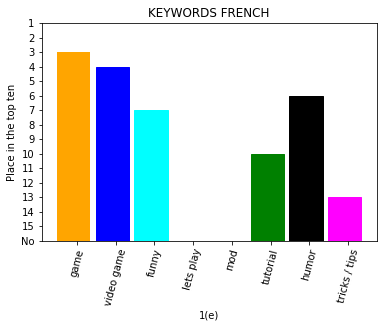

In [174]:
barWidth = 0.3
# height of the blue bars
bars1 = [15,13,10,9, 3, 2, 0 , 0]
bars2 = [14,12,0,0,0,13,7,6]
bars3= [15,11, 5,10,8, 0,4,2]
bars4=  [15,0,4,0,0,7,5,11]
bars5=  [13,12,9,0,0,6,10,3]
# The x position of bars
r1 = np.arange(len(bars1))*0.35
#plot bars
xlabels=['game','video game', 'funny', 'lets play', 'mod', 'tutorial', 'humor', 'tricks / tips']
ylabels=['No','15','14', '13', '12', '11', '10', '9', '8', '7', '6', '5', '4','3','2', '1']
barlist= plt.bar(r1, bars5, width = barWidth, color = 'orange', capsize=7)
barlist[1].set_color('blue')
barlist[2].set_color('cyan')
barlist[3].set_color('violet')
barlist[4].set_color('gray')
barlist[5].set_color('green')
barlist[6].set_color('black')
barlist[7].set_color('magenta')

plt.xticks([r*0.35 + (barWidth*0.10) for r in range(len(bars1))],xlabels, rotation=75)
plt.yticks(np.arange(16), ylabels)
plt.xlabel('1(e)')
plt.ylabel('Place in the top ten')
plt.title("KEYWORDS FRENCH")

In [111]:
r1 = np.arange(len(bars1))*2

In [121]:
np.arange(15)*3

array([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42])